# Excutive summary of EDA

Here is an excutive summary of some fundamental EDA results

* The feature salary range is dropped, as it has extremely high missing percentage, and the format is not easy to work with.
* Based on this EDA result, only the job posting from US is investigated. This is because:
  * Most job posting and fake job posting are from US.
  * Many non-US nations only have one or two posting and they turn out to be fake. This is most likely due to biased sampling.
  * Many non-US job postings have location features in non-standard format.
  * Many non-US job postings have many features that are not in English, which causes issues in NLP.
* Based on this EDA result, for location factors, only the "state" is preserved as the geographical feature.
  * This is because some cities (within US) has a 100% fake job posting rate; this is most likely due to sampling issue. 
* Most simple categorical features like telecommunicating will be preserved, as they are easy to handle, and they hav no missing values.
* Some simple categoricl features, like required education, still have a significant proportion of missing value. Those missing values will be replaced with just text "missing". This is because:
  * The ones with missing value have much higher percentage of fake posting. It is possible that missing this info is a signal of fraud.
 

# Loading package and data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv('fake_job_postings.csv')

# Basic EDA

## Unique value count for each features
Take a very quick look at unique values for each column, this help us decide encoding methods for some categorical features.

In [2]:
# Get the number of unique values for each column
unique_counts = df.nunique()
# Display the result
print(unique_counts.sort_values())

fraudulent                 2
telecommuting              2
has_company_logo           2
has_questions              2
employment_type            5
required_experience        7
required_education        13
function                  37
industry                 131
salary_range             874
department              1337
company_profile         1709
location                3105
benefits                6204
title                  11231
requirements           11967
description            14801
job_id                 17880
dtype: int64


## Missing value investigation
Take very quick look at missing values; the salary range has extremely high missing percentage, and it is given in a format that is not easy to work with. So, in this project, it will be dropped.

In [3]:
# Display the proportion of missing values as percentages
missing_percentage = df.isnull().mean() * 100

# Sort the percentages from smallest to largest
missing_percentage_sorted = missing_percentage.sort_values()

print(missing_percentage_sorted)

job_id                  0.000000
has_questions           0.000000
has_company_logo        0.000000
telecommuting           0.000000
fraudulent              0.000000
title                   0.000000
description             0.005593
location                1.935123
requirements           15.078300
company_profile        18.501119
employment_type        19.412752
industry               27.421700
function               36.101790
required_experience    39.429530
benefits               40.335570
required_education     45.329978
department             64.580537
salary_range           83.959732
dtype: float64


## A quick look at histogram of features with small number of unique values

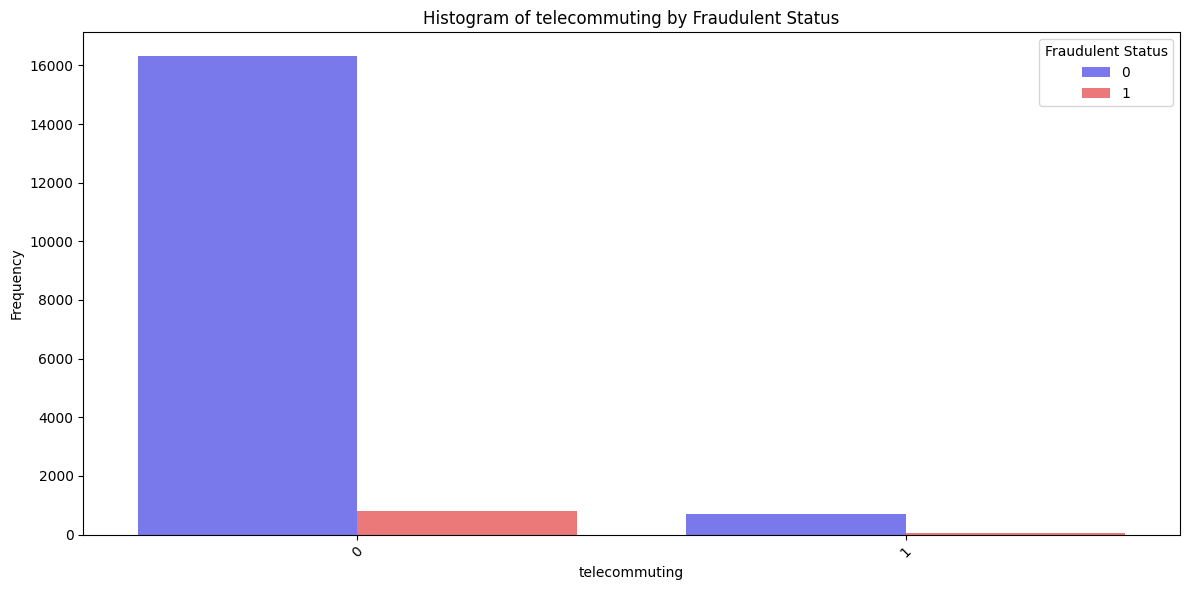

Summary Table:
fraudulent     Total  Percentage Fraudulent
telecommuting                              
0              17113               4.686496
1                767               8.344198


In [4]:
# Hist for telecommuting
# Create the plot
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='telecommuting', hue='fraudulent', palette={0: 'blue', 1: 'red'}, alpha=0.6)

# Add titles and labels
plt.title('Histogram of telecommuting by Fraudulent Status')
plt.xlabel('telecommuting')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Fraudulent Status')
plt.tight_layout()
plt.show()

# Generate summary table
summary_table = df.groupby(['telecommuting', 'fraudulent']).size().unstack(fill_value=0)
summary_table['Total'] = summary_table.sum(axis=1)
summary_table['Percentage Fraudulent'] = (summary_table[1] / summary_table['Total']) * 100

print("Summary Table:")
print(summary_table[['Total', 'Percentage Fraudulent']])

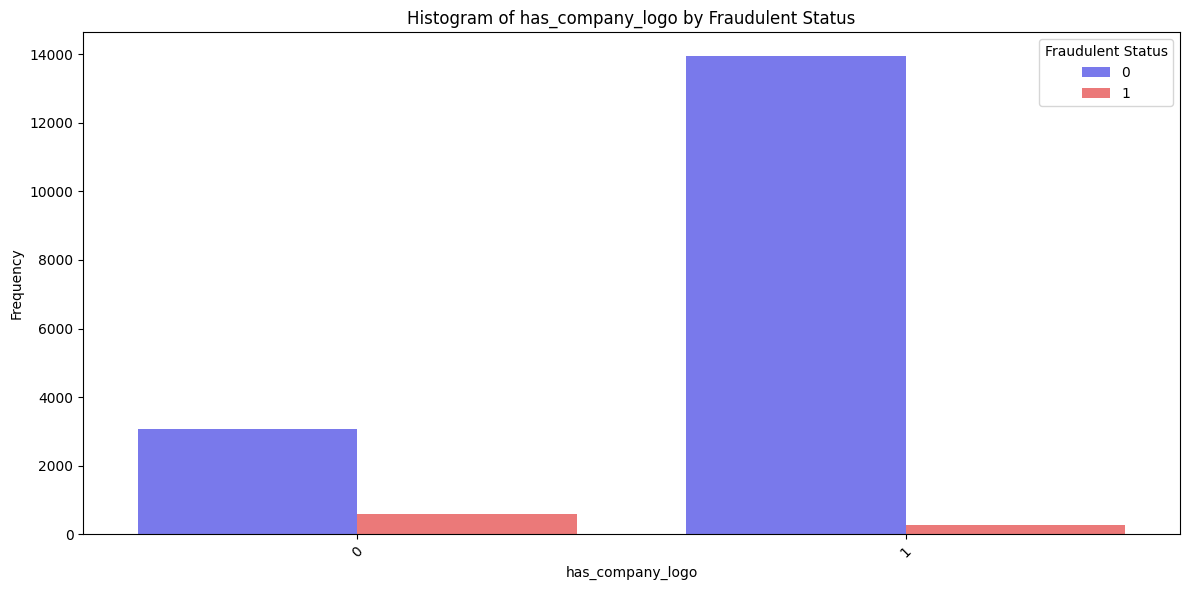

Summary Table:
fraudulent        Total  Percentage Fraudulent
has_company_logo                              
0                  3660              15.928962
1                 14220               1.990155


In [5]:
# Hist for has_company_logo
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='has_company_logo', hue='fraudulent', palette={0: 'blue', 1: 'red'}, alpha=0.6)

# Add titles and labels
plt.title('Histogram of has_company_logo by Fraudulent Status')
plt.xlabel('has_company_logo')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Fraudulent Status')
plt.tight_layout()
plt.show()

# Generate summary table
summary_table = df.groupby(['has_company_logo', 'fraudulent']).size().unstack(fill_value=0)
summary_table['Total'] = summary_table.sum(axis=1)
summary_table['Percentage Fraudulent'] = (summary_table[1] / summary_table['Total']) * 100

print("Summary Table:")
print(summary_table[['Total', 'Percentage Fraudulent']])

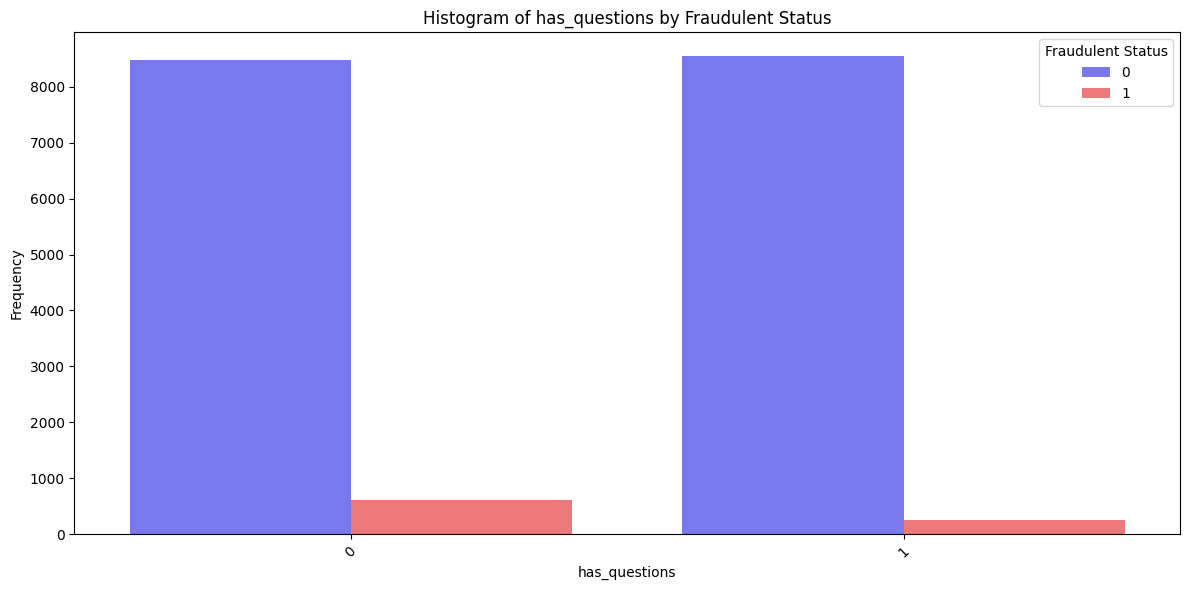

Summary Table:
fraudulent     Total  Percentage Fraudulent
has_questions                              
0               9088               6.778169
1               8792               2.843494


In [6]:
# Hist for has_questions
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='has_questions', hue='fraudulent', palette={0: 'blue', 1: 'red'}, alpha=0.6)

# Add titles and labels
plt.title('Histogram of has_questions by Fraudulent Status')
plt.xlabel('has_questions')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Fraudulent Status')
plt.tight_layout()
plt.show()

# Generate summary table
summary_table = df.groupby(['has_questions', 'fraudulent']).size().unstack(fill_value=0)
summary_table['Total'] = summary_table.sum(axis=1)
summary_table['Percentage Fraudulent'] = (summary_table[1] / summary_table['Total']) * 100

print("Summary Table:")
print(summary_table[['Total', 'Percentage Fraudulent']])

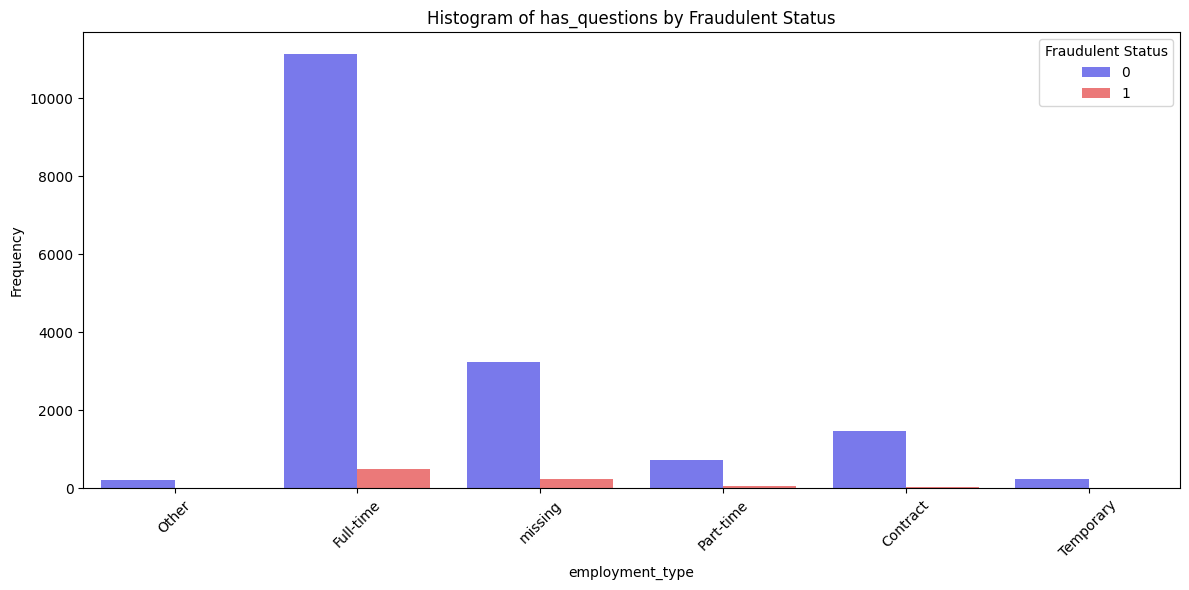

Summary Table:
fraudulent       Total  Percentage Fraudulent
employment_type                              
Contract          1524               2.887139
Full-time        11620               4.216867
Other              227               6.607930
Part-time          797               9.284818
Temporary          241               0.829876
missing           3471               6.943244


In [7]:
# Hist for employment_type
df['employment_type'] = df['employment_type'].fillna('missing')
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='employment_type', hue='fraudulent', palette={0: 'blue', 1: 'red'}, alpha=0.6)

# Add titles and labels
plt.title('Histogram of has_questions by Fraudulent Status')
plt.xlabel('employment_type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Fraudulent Status')
plt.tight_layout()
plt.show()

# Generate summary table
summary_table = df.groupby(['employment_type', 'fraudulent']).size().unstack(fill_value=0)
summary_table['Total'] = summary_table.sum(axis=1)
summary_table['Percentage Fraudulent'] = (summary_table[1] / summary_table['Total']) * 100

print("Summary Table:")
print(summary_table[['Total', 'Percentage Fraudulent']])

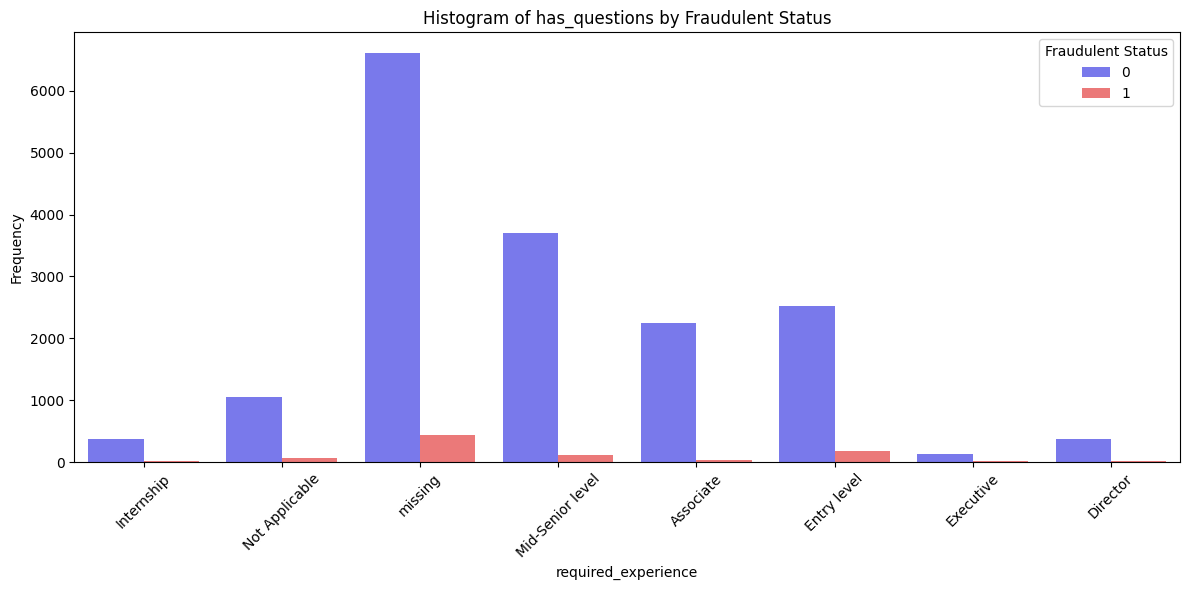

Summary Table:
fraudulent           Total  Percentage Fraudulent
required_experience                              
Associate             2297               1.828472
Director               389               4.370180
Entry level           2697               6.637004
Executive              141               7.092199
Internship             381               2.624672
Mid-Senior level      3809               2.966658
Not Applicable        1116               5.376344
missing               7050               6.170213


In [8]:
# Hist for required_experience
df['required_experience'] = df['required_experience'].fillna('missing')
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='required_experience', hue='fraudulent', palette={0: 'blue', 1: 'red'}, alpha=0.6)

# Add titles and labels
plt.title('Histogram of has_questions by Fraudulent Status')
plt.xlabel('required_experience')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Fraudulent Status')
plt.tight_layout()
plt.show()

# Generate summary table
summary_table = df.groupby(['required_experience', 'fraudulent']).size().unstack(fill_value=0)
summary_table['Total'] = summary_table.sum(axis=1)
summary_table['Percentage Fraudulent'] = (summary_table[1] / summary_table['Total']) * 100

print("Summary Table:")
print(summary_table[['Total', 'Percentage Fraudulent']])

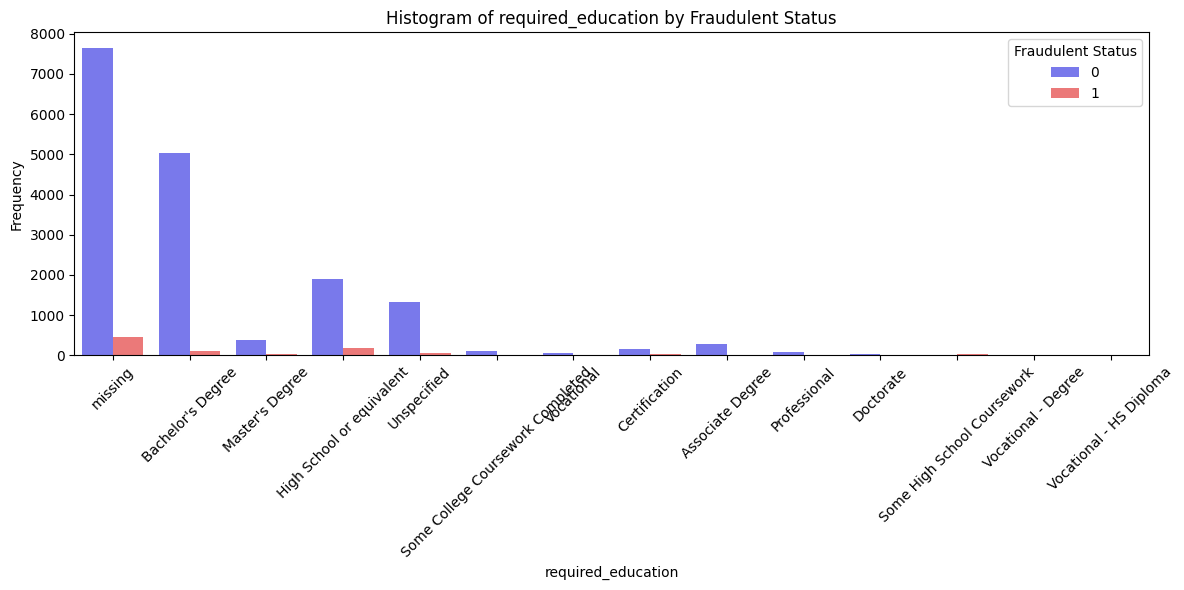

Summary Table:
fraudulent                         Total  Percentage Fraudulent
required_education                                             
Associate Degree                     274               2.189781
Bachelor's Degree                   5145               1.943635
Certification                        170              11.176471
Doctorate                             26               3.846154
High School or equivalent           2080               8.173077
Master's Degree                      416               7.451923
Professional                          74               5.405405
Some College Coursework Completed    102               2.941176
Some High School Coursework           27              74.074074
Unspecified                         1397               4.366500
Vocational                            49               0.000000
Vocational - Degree                    6               0.000000
Vocational - HS Diploma                9               0.000000
missing                  

In [9]:
# Hist for required_education
df['required_education'] = df['required_education'].fillna('missing')
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='required_education', hue='fraudulent', palette={0: 'blue', 1: 'red'}, alpha=0.6)

# Add titles and labels
plt.title('Histogram of required_education by Fraudulent Status')
plt.xlabel('required_education')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Fraudulent Status')
plt.tight_layout()
plt.show()

# Generate summary table
summary_table = df.groupby(['required_education', 'fraudulent']).size().unstack(fill_value=0)
summary_table['Total'] = summary_table.sum(axis=1)
summary_table['Percentage Fraudulent'] = (summary_table[1] / summary_table['Total']) * 100

print("Summary Table:")
print(summary_table[['Total', 'Percentage Fraudulent']])

# Location Feature Handling

## Extract Location feature by country, state and city.

In [10]:
df[['country', 'state', 'city']] = df['location'].str.split(',', n=2, expand=True)

Note that this is a very rudimentary string variable extraction; the dataset's location info is far more complicated, and it is impossible to handle all of them using some simple string manipulation. If one desired to perfectly extract all the location info, an advanced package, specifically designed NLP model, or even a fined-tuned LLM will be needed.

Quick look at histogram by nations.

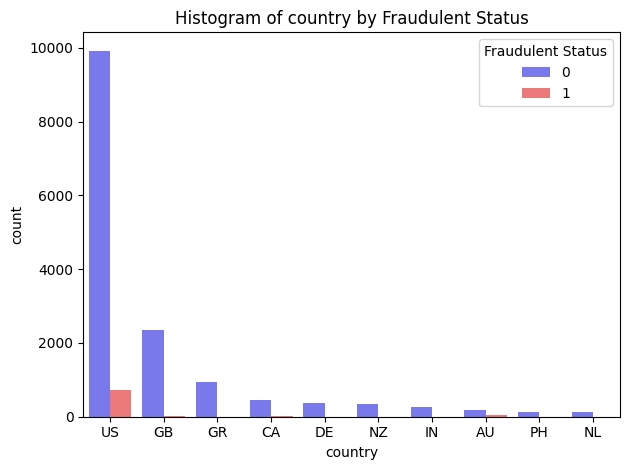

In [11]:
## hist for country
# Step 1: Find top 10 countries by observation count
top_countries = df['country'].value_counts().nlargest(10).index

# Step 2: Filter the DataFrame for these top 10 countries
df_top_countries = df[df['country'].isin(top_countries)]

# Step 3: Plot the countplot
sns.countplot(data=df_top_countries, x='country', hue='fraudulent', palette={0: 'blue', 1: 'red'}, 
              alpha=0.6, order=top_countries)
# Add titles and labels
plt.title('Histogram of country by Fraudulent Status')
plt.legend(title='Fraudulent Status')
plt.tight_layout()
plt.show()

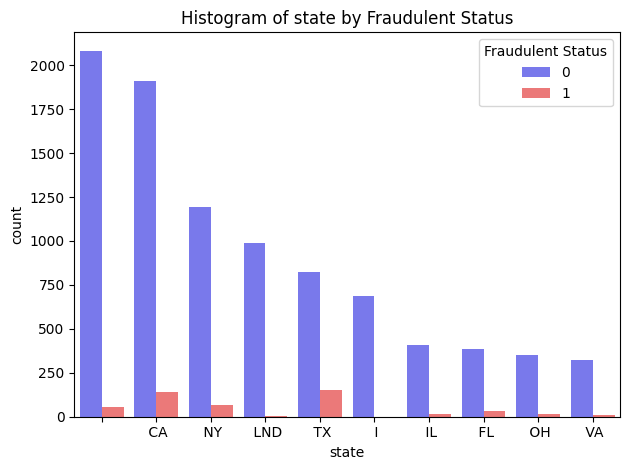

In [12]:
## hist for state
# Step 1: Find top 10 countries by observation count
top_countries = df['state'].value_counts().nlargest(10).index

# Step 2: Filter the DataFrame for these top 10 countries
df_top_countries = df[df['state'].isin(top_countries)]

# Step 3: Plot the countplot
sns.countplot(data=df_top_countries, x='state', hue='fraudulent', palette={0: 'blue', 1: 'red'}, 
              alpha=0.6, order=top_countries)
# Add titles and labels
plt.title('Histogram of state by Fraudulent Status')
plt.legend(title='Fraudulent Status')
plt.tight_layout()
plt.show()

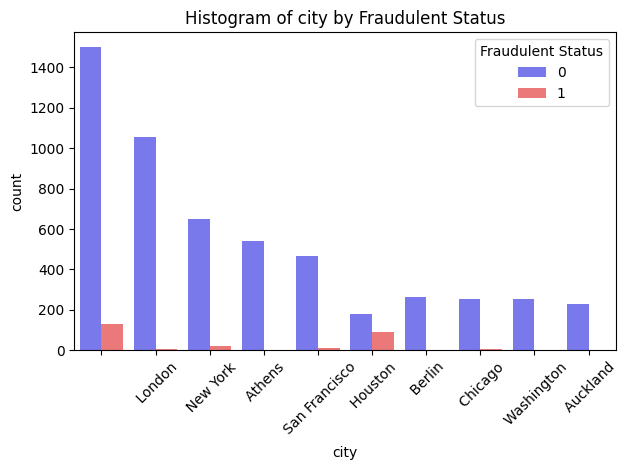

In [13]:
## hist for city
# Step 1: Find top 10 countries by observation count
top_countries = df['city'].value_counts().nlargest(10).index

# Step 2: Filter the DataFrame for these top 10 countries
df_top_countries = df[df['city'].isin(top_countries)]

# Step 3: Plot the countplot
sns.countplot(data=df_top_countries, x='city', hue='fraudulent', palette={0: 'blue', 1: 'red'}, 
              alpha=0.6, order=top_countries)
# Add titles and labels
plt.title('Histogram of city by Fraudulent Status')
plt.legend(title='Fraudulent Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
## top 10 countries with the most fraud percentage
# Step 1: Group by country and calculate counts
country_counts = df.groupby('country')['fraudulent'].agg(total_postings='count', fraudulent_postings='sum')

# Step 2: Calculate the percentage of fraudulent postings
country_counts['fraud_percentage'] = (country_counts['fraudulent_postings'] / country_counts['total_postings']) * 100

# Step 3: Sort by fraud_percentage in descending order
country_counts = country_counts.sort_values(by='fraud_percentage', ascending=False)

# Step 4: Reset the index for better readability
country_counts = country_counts.reset_index()

# Step 5: Print the top 10 countries
print(country_counts[['country', 'fraud_percentage']].head(10))

  country  fraud_percentage
0      MY         57.142857
1      BH         55.555556
2      TW         50.000000
3      QA         28.571429
4      AU         18.691589
5      ID          7.692308
6      US          6.850601
7      SA          6.666667
8      PL          3.947368
9      PK          3.703704


In [15]:
## top 10 states with the most fraud percentage
# Calculate percentage of fake job postings by state
state_counts = df.groupby('state')['fraudulent'].agg(total_postings='count', fraudulent_postings='sum')

# Calculate the percentage of fraudulent postings
state_counts['fraud_percentage'] = (state_counts['fraudulent_postings'] / state_counts['total_postings']) * 100

# Sort by fraud_percentage in descending order
state_counts = state_counts.sort_values(by='fraud_percentage', ascending=False)

# Reset the index for better readability
state_counts = state_counts.reset_index()

# Print the top 10 states
print(state_counts[['state', 'fraud_percentage']].head(10))

  state  fraud_percentage
0   AGB        100.000000
1   ARM        100.000000
2    16        100.000000
3   EAW         66.666667
4    HI         50.000000
5   LIN         50.000000
6   TPQ         50.000000
7    DA         50.000000
8   ANS         50.000000
9    14         40.000000


In [16]:
# Calculate percentage of fake job postings by city
city_counts = df.groupby('city')['fraudulent'].agg(total_postings='count', fraudulent_postings='sum')

# Calculate the percentage of fraudulent postings
city_counts['fraud_percentage'] = (city_counts['fraudulent_postings'] / city_counts['total_postings']) * 100

# Sort by fraud_percentage in descending order
city_counts = city_counts.sort_values(by='fraud_percentage', ascending=False)

# Reset the index for better readability
city_counts = city_counts.reset_index()

# Print the top 10 cities
print(city_counts[['city', 'fraud_percentage']].head(10))

                city  fraud_percentage
0            Durham              100.0
1                All             100.0
2       jacksonville             100.0
3   City of Industry             100.0
4         hazelcrest             100.0
5    Fort Washington             100.0
6       JACKSONVILLE             100.0
7          Annapolis             100.0
8           HONOLULU             100.0
9           Appleton             100.0


In [18]:
# Step 1: Group by country and calculate total fraudulent postings
top_countries = df.groupby('country')['fraudulent'].sum().reset_index()

# Step 2: Rename the column for clarity
top_countries.columns = ['country', 'fraudulent_postings']

# Step 3: Sort by the number of fraudulent postings in descending order
top_countries = top_countries.sort_values(by='fraudulent_postings', ascending=False)

# Step 4: Print the top 10 countries with the most fake job postings
print(top_countries.head(22))

   country  fraudulent_postings
85      US                  730
5       AU                   40
27      GB                   23
55      MY                   12
12      CA                   12
67      QA                    6
9       BH                    5
36      IN                    4
65      PL                    3
82      TW                    2
64      PK                    1
22      EE                    1
23      EG                    1
24      ES                    1
0       AE                    1
71      SA                    1
63      PH                    1
33      ID                    1
88      ZA                    1
10      BR                    1
58      NL                    0
62      PE                    0
